In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
import plotly.express as px
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from imblearn.over_sampling import SMOTE
import time
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, log_loss, mean_squared_error, classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
folders = ['ctu-1-1', 'ctu-3-1', 'ctu-4-1', 'ctu-5-1', 'ctu-8-1']

dataframes = []

for folder in folders:
    attack_path = os.path.join(folder, 'attack_data.csv')
    benign_path = os.path.join(folder, 'benign_data.csv')

    attack_data = pd.read_csv(attack_path)
    benign_data = pd.read_csv(benign_path)

    attack_data['label'] = 1
    benign_data['label'] = 0

    dataframes.append(attack_data)
    dataframes.append(benign_data)

df = pd.concat(dataframes, ignore_index=True)

for col in df.select_dtypes(include=['object']).columns:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    
X = df.drop(columns=['label']) 
y = df['label'] 

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

C:\Users\pc\AppData\Local\Temp\ipykernel_23648\2057636721.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(dataframes, ignore_index=True)


<Figure size 800x600 with 0 Axes>

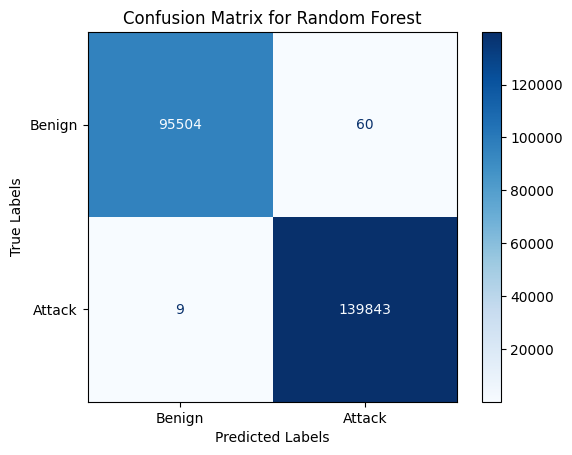

In [4]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Attack"])

plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<Figure size 800x600 with 0 Axes>

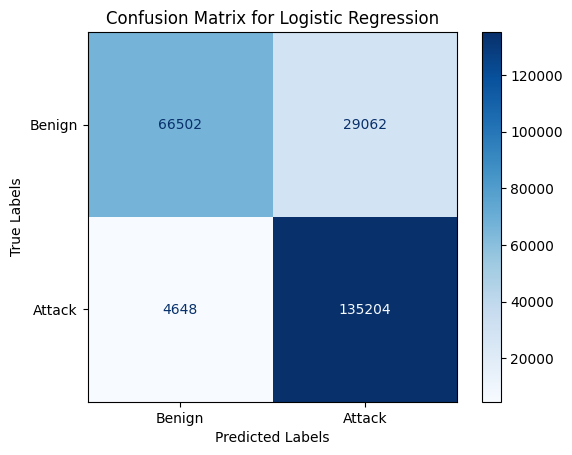

In [5]:
model_lr = LogisticRegression(solver='liblinear')
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred_lr, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Attack"])

plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


<Figure size 800x600 with 0 Axes>

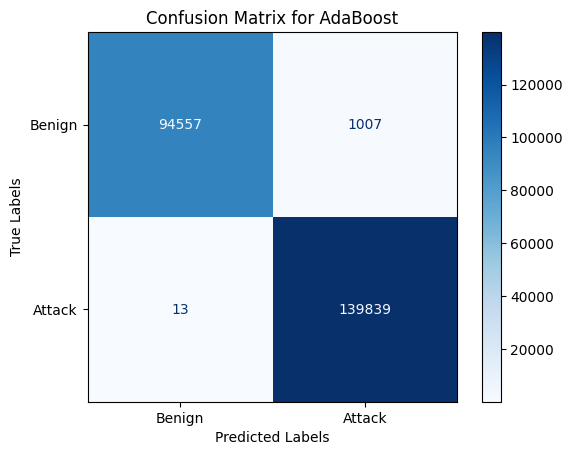

In [7]:
model_ab = AdaBoostClassifier(random_state=42)
model_ab.fit(X_train, y_train)
y_pred_ab = model_ab.predict(X_test)

cm = confusion_matrix(y_test, y_pred_ab, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Attack"])
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for AdaBoost")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<Figure size 800x600 with 0 Axes>

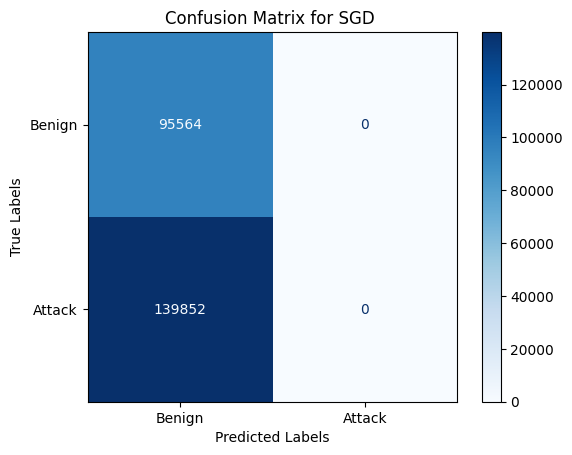

In [9]:
model_sgd = SGDClassifier(random_state=42)
model_sgd.fit(X_train, y_train)
y_pred_sgd = model_sgd.predict(X_test)

cm = confusion_matrix(y_test, y_pred_sgd, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Attack"])
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for SGD ")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<Figure size 800x600 with 0 Axes>

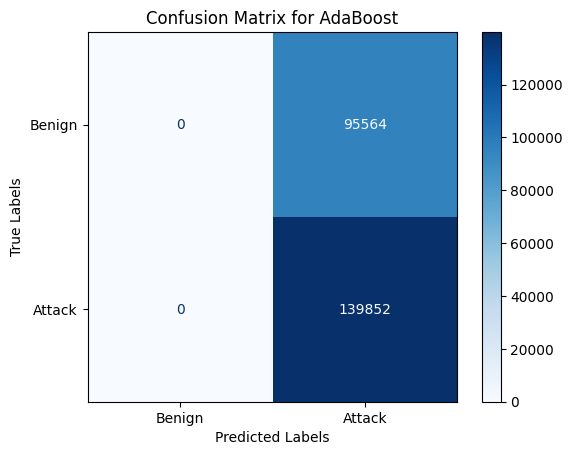

In [8]:
X_train_sample = X_train[:10000]
y_train_sample = y_train[:10000]

model_svm = SVC(random_state=42, probability=True)
model_svm.fit(X_train_sample, y_train_sample)
y_pred_svm = model_svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred_svm, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Attack"])
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<Figure size 800x600 with 0 Axes>

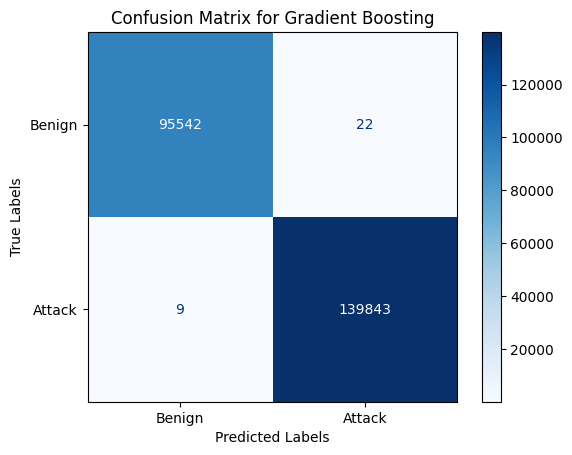

In [10]:
start_time = time.time()
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)
training_time_gb = time.time() - start_time
y_pred_gb = model_gb.predict(X_test)

cm = confusion_matrix(y_test, y_pred_gb, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Attack"])
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for Gradient Boosting")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<Figure size 800x600 with 0 Axes>

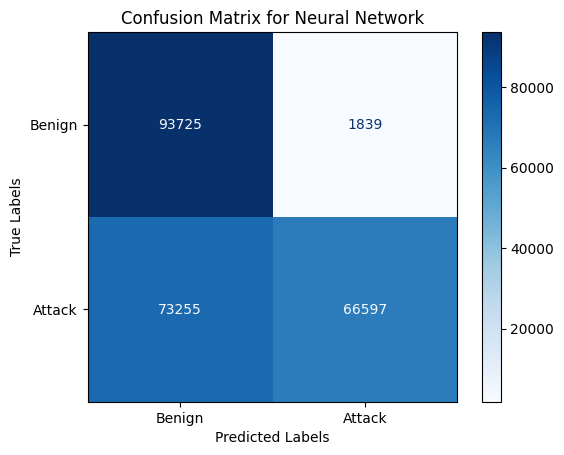

In [11]:
start_time = time.time()
model_mlp = MLPClassifier(hidden_layer_sizes=(128,), random_state=42, max_iter=300)
model_mlp.fit(X_train, y_train)
training_time_mlp = time.time() - start_time
y_pred_mlp = model_mlp.predict(X_test)

cm = confusion_matrix(y_test, y_pred_mlp, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Attack"])
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for Neural Network")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Epoch 1/10


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11771/11771 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.5753 - loss: 1319891.0000 - val_accuracy: 0.5950 - val_loss: 0.6750
Epoch 2/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.5931 - loss: 118.6428 - val_accuracy: 0.5950 - val_loss: 0.6750
Epoch 3/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.5936 - loss: 24.4754 - val_accuracy: 0.5950 - val_loss: 0.6750
Epoch 4/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.5930 - loss: 16.1034 - val_accuracy: 0.5950 - val_loss: 0.6750
Epoch 5/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.5940 - loss: 2.0796 - val_accuracy: 0.5950 - val_loss: 0.6750
Epoch 6/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.5945 - loss: 5.5572 - val_accuracy: 0.5950 - val_loss: 0.6750
Epoch 7/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.5943 - loss: 0.6752 - val_accuracy: 0.5950 - val_loss: 0.6750
Epoch 8/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0

<Figure size 800x600 with 0 Axes>

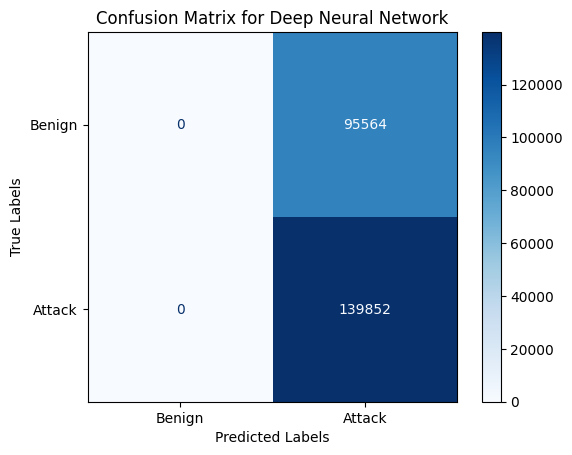

In [14]:
start_time = time.time()

model_dnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid') 
])

model_dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_dnn.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)
training_time_dp = time.time() - start_time

y_pred_dnn = (model_dnn.predict(X_test) > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_dnn, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Attack"])
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for Deep Neural Network")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 59s 5ms/step - accuracy: 0.9560 - loss: 0.1592 - val_accuracy: 0.9603 - val_loss: 0.1466
Epoch 2/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 57s 5ms/step - accuracy: 0.9609 - loss: 0.1453 - val_accuracy: 0.9600 - val_loss: 0.1470
Epoch 3/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 57s 5ms/step - accuracy: 0.9615 - loss: 0.1410 - val_accuracy: 0.9624 - val_loss: 0.1400
Epoch 4/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 56s 5ms/step - accuracy: 0.9617 - loss: 0.1389 - val_accuracy: 0.9605 - val_loss: 0.1445
Epoch 5/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 57s 5ms/step - accuracy: 0.9616 - loss: 0.1355 - val_accuracy: 0.9630 - val_loss: 0.1346
Epoch 6/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 57s 5ms/step - accuracy: 0.9625 - loss: 0.1301 - val_accuracy: 0.9628 - val_loss: 0.1008
Epoch 7/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 57s 5ms/step - accuracy: 0.9636 - loss: 0.1166 - val_accuracy: 0.9657 - val_loss: 0.1108
Epoch 8/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - accuracy: 

<Figure size 800x600 with 0 Axes>

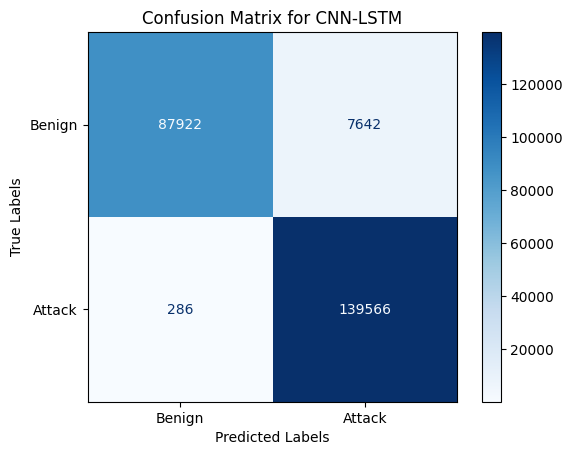

In [13]:
X_train_reshaped = np.expand_dims(X_train, axis=-1) 
X_test_reshaped = np.expand_dims(X_test, axis=-1)

model_cnn_lstm = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    LSTM(50, return_sequences=False), 
    Dropout(0.3),
    Dense(1, activation='sigmoid') 
])

model_cnn_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cnn_lstm.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

y_pred_cnn_lstm = (model_cnn_lstm.predict(X_test_reshaped) > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_cnn_lstm, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Attack"])
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for CNN-LSTM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train1, y_train1)

<Figure size 800x600 with 0 Axes>

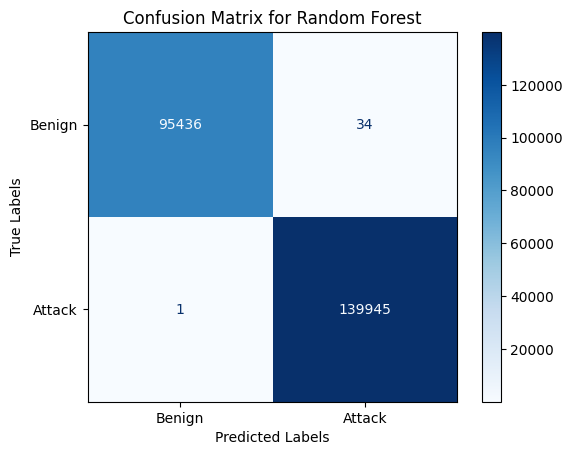

In [17]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Attack"])

plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<Figure size 800x600 with 0 Axes>

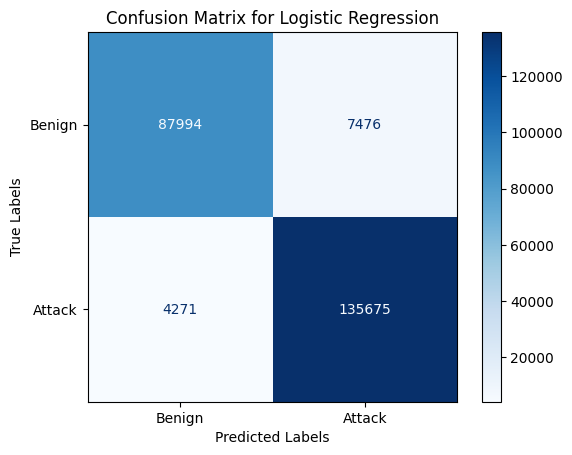

In [18]:
model_lr = LogisticRegression(solver='liblinear')
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred_lr, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Attack"])

plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


<Figure size 800x600 with 0 Axes>

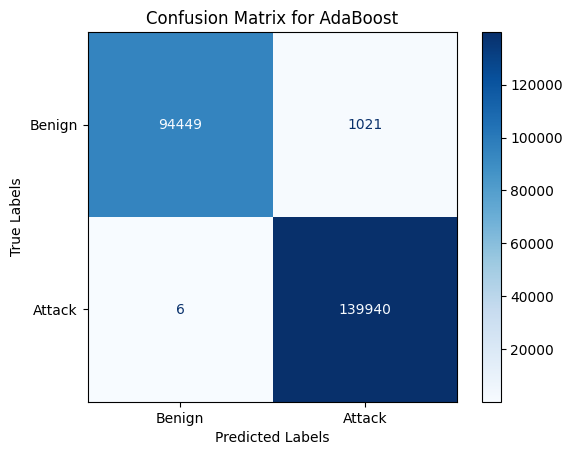

In [19]:
model_ab = AdaBoostClassifier(random_state=42)
model_ab.fit(X_train, y_train)
y_pred_ab = model_ab.predict(X_test)

cm = confusion_matrix(y_test, y_pred_ab, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Attack"])
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for AdaBoost")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<Figure size 800x600 with 0 Axes>

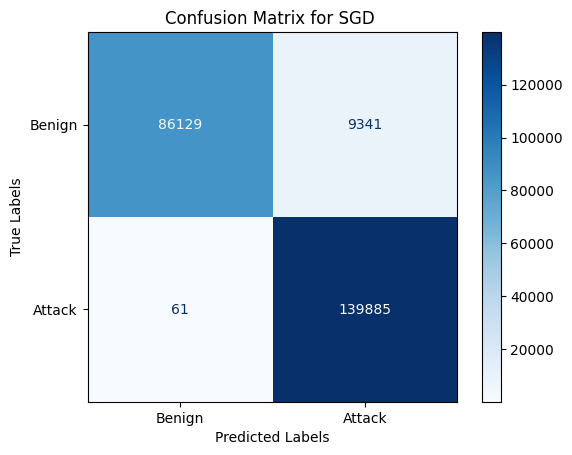

In [20]:
model_sgd = SGDClassifier(random_state=42)
model_sgd.fit(X_train, y_train)
y_pred_sgd = model_sgd.predict(X_test)

cm = confusion_matrix(y_test, y_pred_sgd, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Attack"])
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for SGD ")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<Figure size 800x600 with 0 Axes>

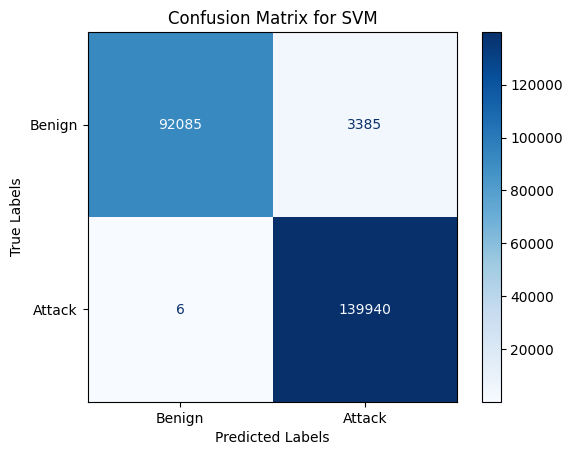

In [21]:
X_train_sample = X_train[:10000]
y_train_sample = y_train[:10000]

model_svm = SVC(random_state=42, probability=True)
model_svm.fit(X_train_sample, y_train_sample)
y_pred_svm = model_svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred_svm, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Attack"])
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<Figure size 800x600 with 0 Axes>

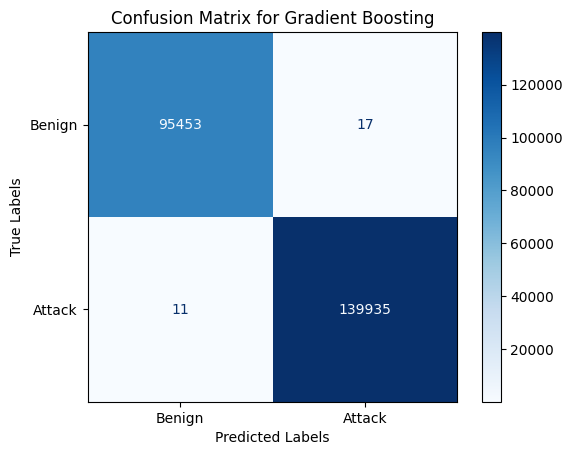

In [22]:
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

cm = confusion_matrix(y_test, y_pred_gb, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Attack"])
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for Gradient Boosting")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<Figure size 800x600 with 0 Axes>

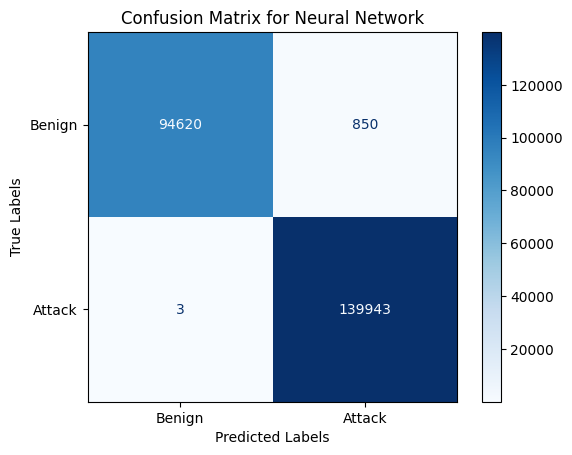

In [23]:
model_mlp = MLPClassifier(hidden_layer_sizes=(128,), random_state=42, max_iter=300)
model_mlp.fit(X_train, y_train)
y_pred_mlp = model_mlp.predict(X_test)

cm = confusion_matrix(y_test, y_pred_mlp, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Attack"])
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for Neural Network")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Epoch 1/10


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11771/11771 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9840 - loss: 0.0645 - val_accuracy: 0.9933 - val_loss: 0.0337
Epoch 2/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9933 - loss: 0.0344 - val_accuracy: 0.9937 - val_loss: 0.0296
Epoch 3/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9933 - loss: 0.0321 - val_accuracy: 0.9938 - val_loss: 0.0287
Epoch 4/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9935 - loss: 0.0301 - val_accuracy: 0.9939 - val_loss: 0.0268
Epoch 5/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9935 - loss: 0.0292 - val_accuracy: 0.9938 - val_loss: 0.0258
Epoch 6/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9936 - loss: 0.0283 - val_accuracy: 0.9938 - val_loss: 0.0249
Epoch 7/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9937 - loss: 0.0272 - val_accuracy: 0.9939 - val_loss: 0.0237
Epoch 8/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9938 - lo

<Figure size 800x600 with 0 Axes>

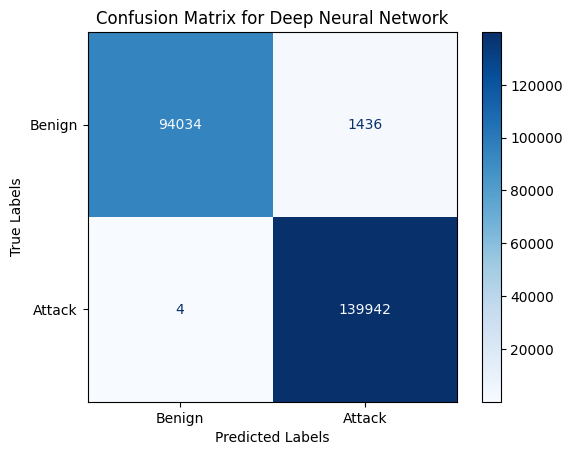

In [24]:
model_dnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid') 
])

model_dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_dnn.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

y_pred_dnn = (model_dnn.predict(X_test) > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_dnn, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Attack"])
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for Deep Neural Network")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Epoch 1/10


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11771/11771 ━━━━━━━━━━━━━━━━━━━━ 69s 6ms/step - accuracy: 0.9769 - loss: 0.0732 - val_accuracy: 0.9935 - val_loss: 0.0335
Epoch 2/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 65s 5ms/step - accuracy: 0.9934 - loss: 0.0342 - val_accuracy: 0.9940 - val_loss: 0.0293
Epoch 3/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 66s 6ms/step - accuracy: 0.9938 - loss: 0.0298 - val_accuracy: 0.9954 - val_loss: 0.0239
Epoch 4/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 66s 6ms/step - accuracy: 0.9952 - loss: 0.0243 - val_accuracy: 0.9960 - val_loss: 0.0209
Epoch 5/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 71s 6ms/step - accuracy: 0.9958 - loss: 0.0220 - val_accuracy: 0.9962 - val_loss: 0.0241
Epoch 6/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 70s 6ms/step - accuracy: 0.9961 - loss: 0.0210 - val_accuracy: 0.9965 - val_loss: 0.0196
Epoch 7/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 69s 6ms/step - accuracy: 0.9962 - loss: 0.0207 - val_accuracy: 0.9957 - val_loss: 0.0224
Epoch 8/10
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 67s 6ms/step - accuracy: 0.9962 - lo

<Figure size 800x600 with 0 Axes>

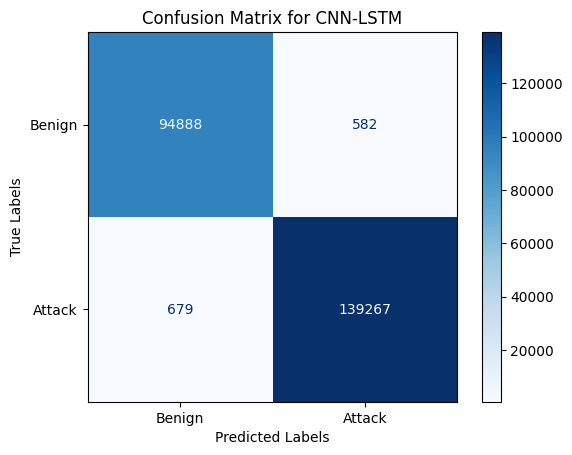

In [25]:
X_train_reshaped = np.expand_dims(X_train, axis=-1) 
X_test_reshaped = np.expand_dims(X_test, axis=-1)

model_cnn_lstm = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    LSTM(50, return_sequences=False), 
    Dropout(0.3),
    Dense(1, activation='sigmoid') 
])

model_cnn_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cnn_lstm.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

y_pred_cnn_lstm = (model_cnn_lstm.predict(X_test_reshaped) > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_cnn_lstm, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Attack"])
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for CNN-LSTM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
